Task 5.2DHD

In [90]:
import pandas as pd
import numpy as np

In [91]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
                'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
                'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
                'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
                'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
                'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type',
                'success_pred']

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

# Step #1: Load the Data
trainDataFrame: pd.DataFrame = pd.read_csv('./data/Week_5_NSL-KDD-Dataset/KDDTrain+.txt',names=header_names)
testDataFrame: pd.DataFrame = pd.read_csv('./data/Week_5_NSL-KDD-Dataset/KDDTest+.txt',names=header_names)
attack_types = pd.read_csv('./data/Week_5_NSL-KDD-Dataset/training_attack_types.txt',delimiter=' ',header=None, names=['attack_type','attack_category'])
attack_types = pd.concat([attack_types, pd.DataFrame([['normal', 'benign']], columns=['attack_type', 'attack_category'])], ignore_index=True)
# attack_types['benign'].append('normal')

trainDataFrame = trainDataFrame.merge(attack_types, on="attack_type",how='left')
testDataFrame = testDataFrame.merge(attack_types, on="attack_type",how='left')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,success_pred,attack_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,benign
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,benign
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,benign
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125979,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,dos
125980,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,benign
125981,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,benign
125982,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,dos


# Data Exploration

<Axes: ylabel='attack_category'>

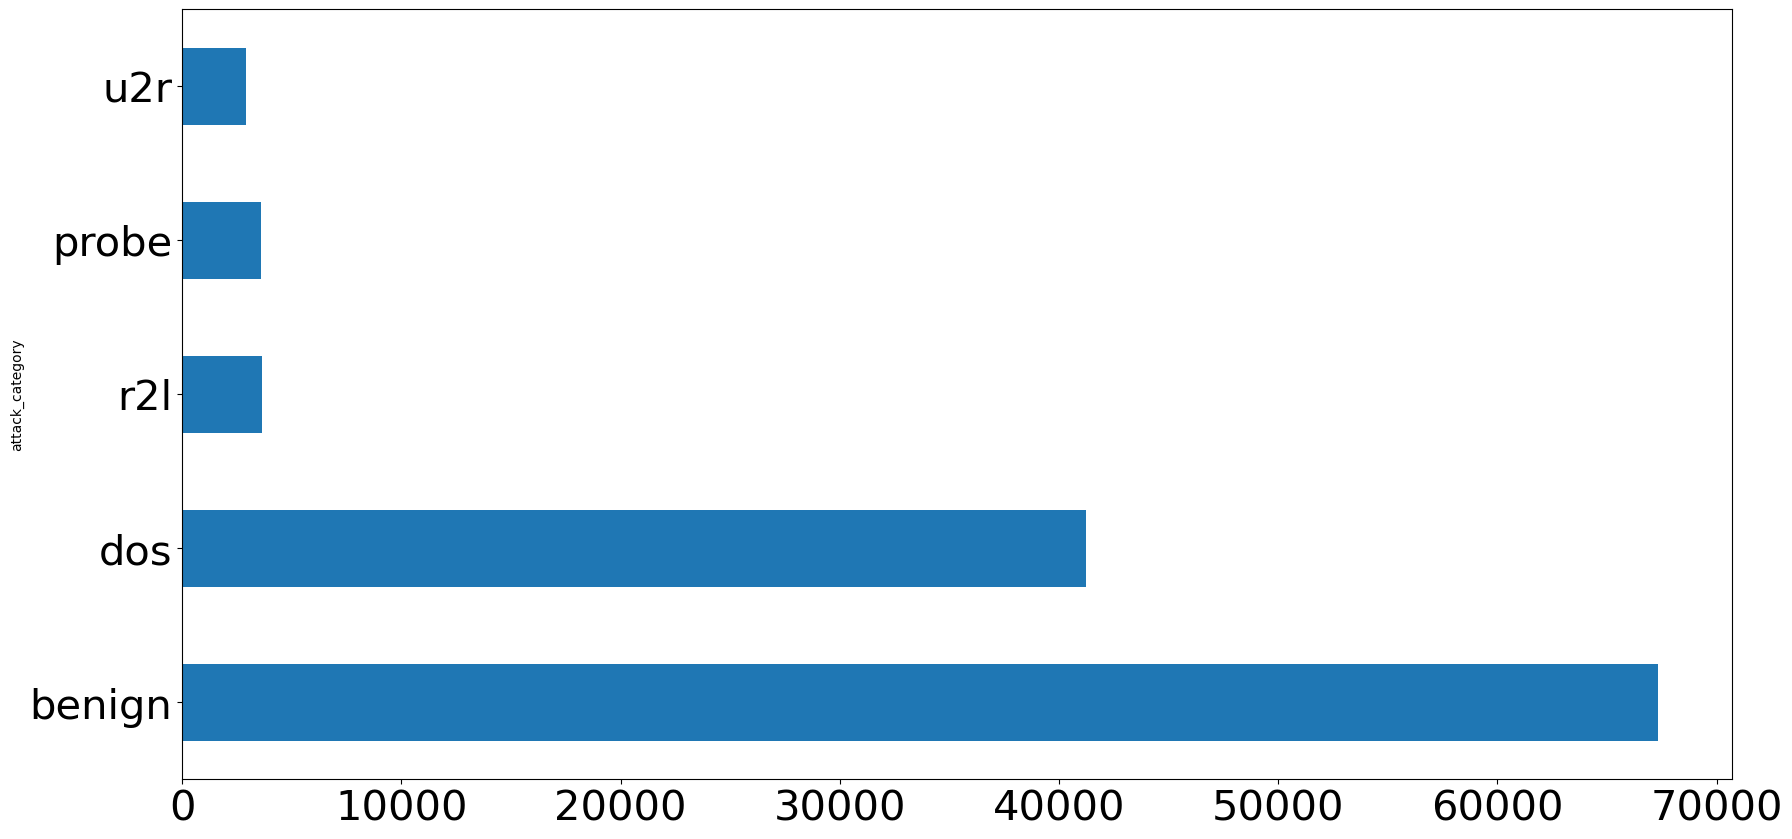

In [92]:
train_attack_types = trainDataFrame['attack_type'].value_counts()
train_attack_cats = testDataFrame['attack_category'].value_counts()

test_attack_types = trainDataFrame['attack_type'].value_counts()
test_attack_cats = testDataFrame['attack_category'].value_counts()
train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)
train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

In [93]:
trainDataFrame[binary_cols].describe().transpose()

# We note that su_attempted has a max value of 2 when it is a binary value! this should not occure.
trainDataFrame.groupby(['su_attempted']).size()
testDataFrame.groupby(['su_attempted']).size()

trainDataFrame['su_attempted'] = trainDataFrame['su_attempted'].replace(2, 0)
testDataFrame['su_attempted'] = testDataFrame['su_attempted'].replace(2, 0)

trainDataFrame.groupby(['su_attempted']).size()
testDataFrame.groupby(['su_attempted']).size()



su_attempted
0    22545
1        2
dtype: int64

In [94]:
trainDataFrame['num_outbound_cmds'].describe().transpose()
trainDataFrame['num_outbound_cmds'].unique()
# We notice this is 0 throughout! hence we remove it.
trainDataFrame = trainDataFrame.drop(['num_outbound_cmds'], axis=1)
testDataFrame = testDataFrame.drop(['num_outbound_cmds'], axis=1)
numeric_cols.remove('num_outbound_cmds')

In [95]:
# Data Preparation

train_Y = trainDataFrame['attack_category']
train_x_raw = trainDataFrame.drop(['attack_category','attack_type'], axis=1)
test_Y = testDataFrame['attack_category']
test_x_raw = testDataFrame.drop(['attack_category','attack_type'], axis=1)


combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

#execute the commands in console
train_x.describe()
train_x['duration'].describe()
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Experimenting with MaxAbsScaler on the single 'duration' feature
from sklearn.preprocessing import MaxAbsScaler

max_Abs_scaler = MaxAbsScaler().fit(durations)
robust_scaled_durations = max_Abs_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Let's proceed with StandardScaler- Apply to all the numeric columns

standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = standard_scaler.transform(test_x[numeric_cols])

train_x.describe()



train_Y_bin = train_Y.apply(lambda x: 0 if x == 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x == 'benign' else 1)

C:\Users\shoun\AppData\Local\Temp\ipykernel_14928\1305518271.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x[numeric_cols] = standard_scaler.transform(train_x[numeric_cols])
C:\Users\shoun\AppData\Local\Temp\ipykernel_14928\1305518271.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x[numeric_cols] = standard_scaler.transform(test_x[numeric_cols])


In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, r2_score

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)
# r2 = r2_score(test_Y, pred_y)

print(results)
print(error)
# print(r2)
pred_y

[[9409   55  214    1   32]
 [1312 5827  485   12    0]
 [ 670  189 1562    0    2]
 [2113    5   73  294   92]
 [ 140    0    5   35   20]]
0.24105202465959996


array(['dos', 'dos', 'benign', ..., 'dos', 'benign', 'benign'],
      dtype=object)